#Data Analysis for Point 3
------
##Definition of Point 3
Finally, take the following dataset (https://www.dropbox.com/s/otc12z2w7f7xm8z/mnistTask3.zip), train on this dataset and provide test accuracy on the MNIST test set, using the same test split from part 2. Train using scratch random initialization and using the pretrained network part 1. Do the same analysis as 2 and report what happens this time. Try and do qualitative analysis of what's different in this dataset. Please save your model checkpoints.

###Solution:
This dataset did not have a clear distinguishing factor between the folder and images within that folder at first glance. Their labels were required to be predicted for smooth training for this point.

Therefore the model trained from scratch in point 2 [Point2_Train_Scratch.ipynb](https://colab.research.google.com/drive/1W_n2OE5CFStZ0_nExiW_CekZrHjYcxEO?usp=sharing) was used to predict the labels. That specific model was chosen because of its high test accuracy (99%). 

This notebook, therefore has the analysis of the newly created dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import torch
import csv
from torch import nn
import pandas as pd
import cv2 as cv
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout, ZeroPad2d
from torchvision import transforms, datasets
import shutil
from sklearn.metrics import auc, confusion_matrix, classification_report
import seaborn as sns
from scipy.optimize import brentq
from scipy.interpolate import interp1d
import random
#from pycm import *

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MIDAS/Point3/dataset_p3.csv")
df = df.sample(frac = 1)
df.head()

,FilePath,Label
33555,/content/mnistTask/1/image_028487.jpg,4
11899,/content/mnistTask/0/image_001426.jpg,9
17652,/content/mnistTask/6/image_029844.jpg,3
45957,/content/mnistTask/6/image_004305.jpg,8
6882,/content/mnistTask/3/image_045776.jpg,7


#Analysis

The major difference in this dataset was that for a particular folder, for example the folder *'4'* had the lowest number of images of label 4. It had a decent amount of the other labels.

The example is demonstrated below.

In [ ]:
df_check = df[df['FilePath'].str.contains('/4/')]
df_check.head()

,FilePath,Label
57085,/content/mnistTask/4/image_039887.jpg,6
16375,/content/mnistTask/4/image_027382.jpg,6
8212,/content/mnistTask/4/image_012706.jpg,1
37940,/content/mnistTask/4/image_033314.jpg,6
31948,/content/mnistTask/4/image_006167.jpg,7


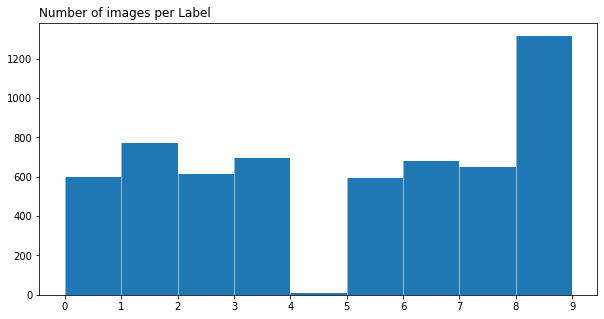

In [ ]:
fig = plt.figure(figsize=(10,5))
bins = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n, bins, patches = plt.hist(df_check.Label, bins = bins)
plt.xticks(bins)
plt.grid(color='white', lw = 0.5, axis='x')
plt.title('Number of images per Label', loc = 'left', fontsize = 12)
plt.show()

<BarContainer object of 10 artists>

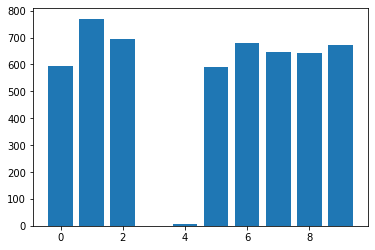

In [ ]:
plt.bar(l, list(df_check['Label'].value_counts()))

In [ ]:
l = [1, 2, 6, 9, 7, 8, 2, 0, 5, 4]
df_check['Label'].value_counts()

1    770
3    693
6    680
9    672
7    647
8    643
2    614
0    596
5    591
4      8
Name: Label, dtype: int64